In [5]:
# Trazador (spline) lineal, grado 1
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

def trazalineal(xi,fi):
    n = len(xi)
    x = sym.Symbol('x')
    px_tabla = []
    
    tramo = 1
    while not(tramo>=n):
        # con 1ra diferencia finita avanzada 
        numerador = fi[tramo]-fi[tramo-1]
        denominador = xi[tramo]-xi[tramo-1]
        m = numerador/denominador
        pxtramo = fi[tramo-1] + m*(x-xi[tramo-1])
        px_tabla.append(pxtramo)
        tramo = tramo + 1
        
    return(px_tabla)

# PROGRAMA
# INGRESO , Datos de prueba
xi = [0.1 , 0.2, 0.3, 0.4]
fi = [1.45, 1.8, 1.7, 2.0]

#xi = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
#fi = np.array([0,25,0,34,26,25,15,25,25,6,27,25])

muestras = 10 # entre cada par de puntos

# PROCEDIMIENTO
# Tabla de polinomios por tramos
n = len(xi)
px_tabla = trazalineal(xi,fi)

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1,n,1):
    print('  x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))

Polinomios por tramos: 
  x = [0.1,0.2]
3.5*x + 1.1
  x = [0.2,0.3]
2.0 - 1.0*x
  x = [0.3,0.4]
3.0*x + 0.8


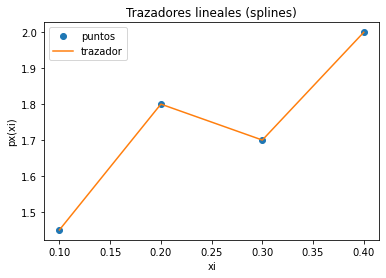

In [6]:
# GRAFICA
# Puntos para graficar cada tramo
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)

    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)

    # vectores de trazador en x,y
    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1

# Gráfica
plt.plot(xi,fi,'o', label='puntos')
plt.plot(xtraza,ytraza, label='trazador')
plt.title('Trazadores lineales (splines)')
plt.xlabel('xi')
plt.ylabel('px(xi)')
plt.legend()
plt.show()